In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def getStation(file1, st):
    elev1 = []
    
    with open(file1) as f1:
        l1 = f1.readline()
        l1 = f1.readline()
        
        # Get timestep info
        info = l1.split()
        skip = float(info[3])
        dt = float(info[2]) / skip
        
        l1 = f1.readline()

        for lineno, line in enumerate(f1):
            lines = line.split()
            if lines[0] == str(st):
                x = float(lines[1])
                
                # If dry, set to zero
                if x < -100:
                    x = 0.
                    
                elev1.append(x)

    time = np.arange(len(elev1))*dt*skip/86400.

    return time, np.array(elev1)

def getGauge(gauges, gauge, dt=3600, offset=12):
    elev = []
    path = gauges["path"]
    file = path + gauges[gauge][0] + ".csv"
    
    with open(file) as f1:
        l1 = f1.readline()
        for lineno, line in enumerate(f1):
            lines = line.split(',')
            if lines[-1] == '\"-\"\n':
                break

            elev.append(float(lines[-1][1:-2]))

    elev = elev[offset:]
    time = np.arange(len(elev))*dt/86400.
    return time, elev

## List of gauges for different datasets

In [2]:
# Cut mesh
gauges1 = {
    "path": "/workspace/chg/gauges/Ike/",
    2:("pier_21", "Galveston Pier 21"),
    56: ("uss_lexington", "USS Lexington"),
    162: ("south_bird", "South Bird Island"),
    52: ("north_jetty", "Galveston Entrance North Jetty"),
    3: ("pleasure_pier", "Galveston Pleasure Pier"),
    80: ("sss_tx_har_002", "SSS-TX-HAR-002"),
    33: ("port_aransas", "Port Aransas"),
    161: ("bob_hall", "Bob Hall Pier"),
    126: ("lamarque_pump", "La Marque Pump Station")
}

# Neches
gauges2 = {
    "path": "/workspace/chg/gauges/Neches/",
    39: ("beaumont_club", "Beaumont Yacht Club"),
    38: ("sabine_north", "Sabine Pass North"),
    24: ("sabine_ras_5", "Sabine RAS 5"),
    37: ("rainbow_bridge", "Rainbow Bridge"),
    40: ("saltwater_barrier", "Salt Water Barrier")
}

## 1. Select the fort.61 files and corresponding gauges

In [3]:
''' Ike on Cut mesh'''
# file1 = 'Ike-eirik/fort.61'
# file2 = 'Ike-fin/fort.61.halved'
# file3 = 'Ike-noswan/fort.61'
# file4 = '../120-swan/fort.61'
# gauges = gauges1

# skip = 300
# st = 33
# t1,e1 = getStation(file1, st, skip, 2.)
# t2,e2 = getStation(file2, st, skip, 2.)
# t3,e3 = getStation(file3, st, 900, 0.5)
# #t4,e4 = getStation(file4, st, skip, 2.)
# #t4,e4 = getGauge(st)

# ''' Neches mesh'''
file1 = 'neches/fort.61'
file2 = 'neches-rain/fort.61'
gauges = gauges2

st = 37
t1,e1 = getStation(file1, st)
t2,e2 = getStation(file2, st)

''' Dolly on cut mesh'''
# file1 = 'Dolly/fort.61'
# gauges = gauges1
# st = 11
# t1, e1 = getStation(file1, st)

''' Harvey'''
# file1 = 'Harvey/fort.61'
# file2 = 'Harvey/fort.61.full'
# file3 = 'Harvey/storm/fort.61'
# file4 = 'Harvey/storm/fort.61.full'
# gauges = gauges1
# st = 161
# t1, e1 = getStation(file3,st)
# t2, e2 = getStation(file4,st)

' Harvey'

## 2. Plot the files

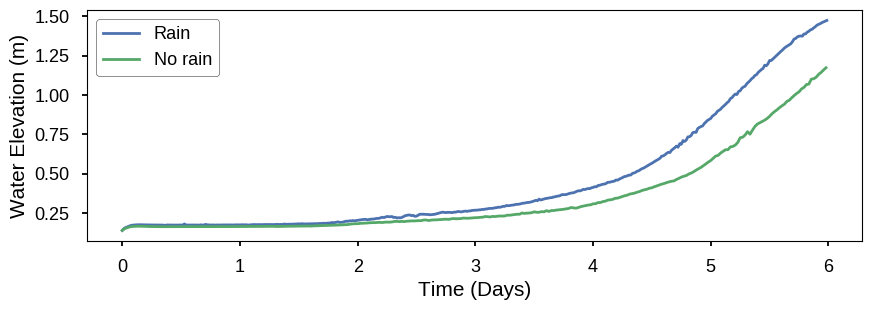

In [13]:
plt.style.use('seaborn-talk')
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.figsize'] = [10, 3]

f = plt.figure()

''' Cut mesh'''
# #plt.plot(t1, e1, label='120m mesh')
# plt.plot(t2, e2, label='Cut mesh')
# plt.plot(t3, e3, label='2008 mesh (no advection)')
# #plt.plot(t4, e4, linestyle='--', label='120m mesh + SWAN')
# #plt.plot(t4, e4, linestyle='--', color='darkorange', label='Gauge data')

'''Neches'''
plt.plot(t2, e2, label='Rain')
plt.plot(t1, e1, label='No rain')


''' Dolly on cut mesh'''
#plt.plot(t1, e1, label='DG')

''' Harvey'''
# plt.plot(t1, e1, label='Cut mesh')
# plt.plot(t2, e2, label='120m mesh')

plt.xlabel('Time (Days)', fontsize=15)
plt.ylabel('Water Elevation (m)', fontsize=15)
plt.legend(frameon=True, edgecolor="black")
#plt.title(gauges[st][1])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)



plt.show()

## 3. Save the figure

In [14]:
name = 'rainbow_bridge'
f.savefig(name + '.png', dpi=300, bbox_inches='tight')

In [12]:
plt.rcParams["font.family"]
plt.rc('font',**{'family':'sans-serif','sans-serif':['Liberation Sans']})
plt.rcParams["font.family"]

['sans-serif']